<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass-Lab  <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Earthquake data)
The data records the earthquakes experienced for the last few years in the USA. There are four parameters in the data, where each data point represents an earthquake.

**Latitude**: Latitude of the place (above the equator)

**Longitude**: Longitude of the place (west of the prime meridian)

**DepthMeters**: Absolute height of the place

**Magnitude**: Magnitude of the earthquake wave

## Table of Content

1. **[Exploratory Data Analysis](#eda)**
2. **[K-means Clustering](#k-means)**
3. **[Interpret the Clusters](#inter)**

#### Import the required libraries

In [22]:
# write your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the csv file and print the first five observations.

In [2]:
# write your code here

df = pd.read_csv("Earthquake_Data.csv")

df.head()

,Latitude,Longitude,DepthMeters,Magnitude
0,39.644,-75.483,5000,2.8
1,37.379,-80.746,11500,2.8
2,45.296,-73.475,18000,2.1
3,42.825,-78.239,5000,2.4
4,38.619,-80.909,100,3.4


### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find the number of variables and the number of observations in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# write your code here

num_obs, num_var = df.shape

print(num_obs)
print(num_var)

1647
4


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the datatype of each variable in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# write your code here

print(df.dtypes)

Latitude       float64
Longitude      float64
DepthMeters      int64
Magnitude      float64
dtype: object


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Find if there are missing values in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# write your code here
missing_val = df.isnull().sum()

missing_val

Latitude       0
Longitude      0
DepthMeters    0
Magnitude      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Obtain the summary statistic of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# write your code here
print(df.describe())


          Latitude    Longitude   DepthMeters    Magnitude
count  1647.000000  1647.000000   1647.000000  1647.000000
mean     39.903436   -79.008111   7559.720704     2.384827
std       2.410973     3.192442   5205.963953     0.459781
min      37.007700   -82.881000    100.000000     0.200000
25%      37.902400   -81.694150   3450.000000     2.100000
50%      38.477800   -80.831400   6400.000000     2.400000
75%      41.467200   -75.934050  11500.000000     2.600000
max      45.300900   -73.063400  32300.000000     5.200000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the outliers in the dataset using boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

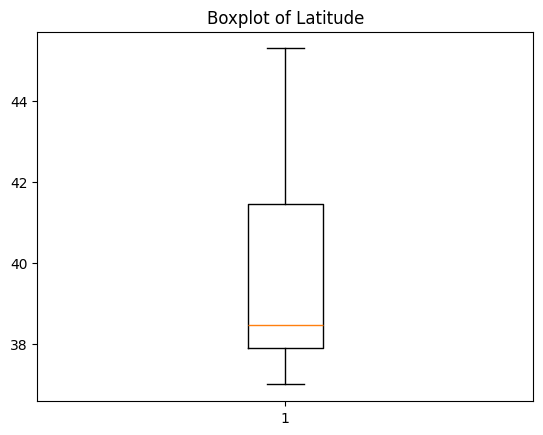

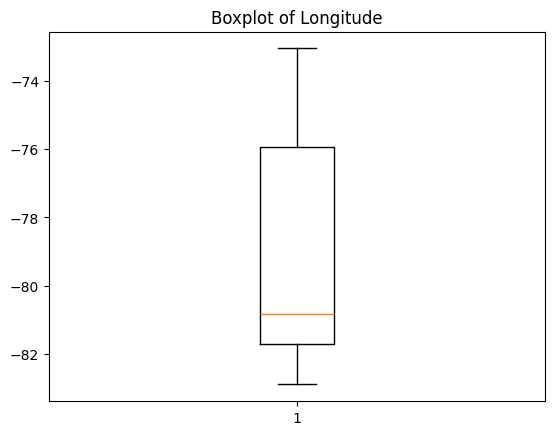

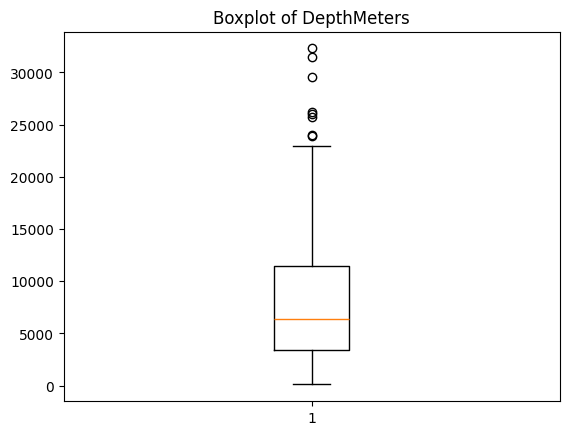

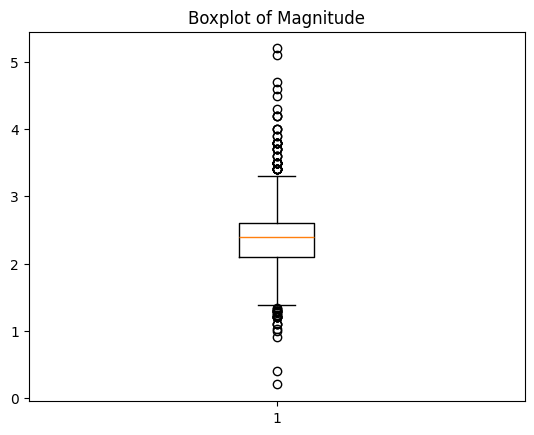

In [28]:
# write your code here

values_column = ['Latitude' , 'Longitude' , 'DepthMeters' , 'Magnitude']
# Suppose your data column with values is 'values_column'
# and you want to see if 'Gojla' is an outlier in this column

for col in values_column:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Remove the outliers using the IQR method and check the shape of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# write your code here

df_clean = df.copy()  # create a copy to keep original data safe

for col in values_column:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keep only rows where col values are within bounds
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print("Shape of data after removing outliers:", df_clean.shape)


Shape of data after removing outliers: (1562, 4)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Drop the variables representing the geographical coordinates of the earthquake.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
# write your code here

# df = df.drop(['Latitude', 'Longitude'], axis=1)
df.head()

,DepthMeters,Magnitude
0,-0.491839,0.903254
1,0.757108,0.903254
2,2.006055,-0.619672
3,-0.491839,0.033011
4,-1.433353,2.208618


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Transform the variables such that it will have mean 0 and standard deviation 1 and print the summary statistics.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# write your code here

from sklearn.preprocessing import StandardScaler

values_column = ['DepthMeters', 'Magnitude']  # Example columns you want to scale

scaler = StandardScaler()
df[values_column] = scaler.fit_transform(df[values_column])

print(df[values_column].describe())


        DepthMeters     Magnitude
count  1.647000e+03  1.647000e+03
mean  -1.294249e-17  7.938061e-16
std    1.000304e+00  1.000304e+00
min   -1.433353e+00 -4.753326e+00
25%   -7.896653e-01 -6.196717e-01
50%   -2.228354e-01  3.301058e-02
75%    7.571078e-01  4.681321e-01
max    4.753739e+00  6.124712e+00


<a id="k-means"> </a>
## 2. K-means Clustering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find within cluster sum of squares for the number of clusters from 1 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# write your code here

from sklearn.cluster import KMeans

# Suppose you want to cluster on numeric columns only
# example numeric columns for clustering
X = df[values_column]

wcss = []

for k in range(1, 8):  # clusters 1 to 7
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

for i, val in enumerate(wcss, start=1):
    print(f"WCSS for {i} clusters: {val}")



WCSS for 1 clusters: 3294.0
WCSS for 2 clusters: 2103.5076515830106
WCSS for 3 clusters: 1502.9977155634047
WCSS for 4 clusters: 1146.3039283500266
WCSS for 5 clusters: 959.3206837856634
WCSS for 6 clusters: 833.7917566027583
WCSS for 7 clusters: 718.1353057969277


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Visualize the elbow plot to get the optimal value of K.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

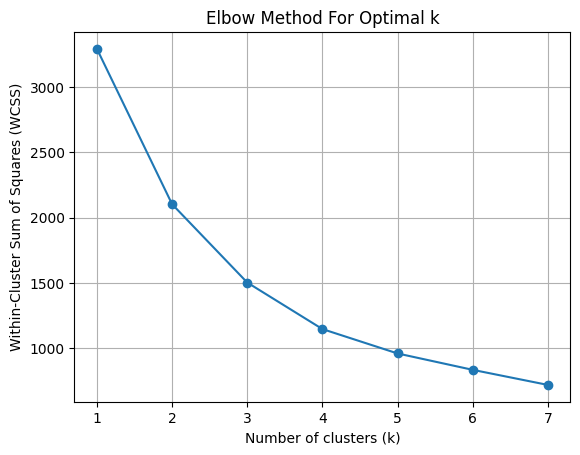

In [41]:
# write your code here
# Plot the elbow curve
plt.plot(range(1, 8), wcss, marker='o' , linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.xticks(range(1, 8))
plt.grid(True)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the silhouette coefficient for the number of clusters from 2 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
# write your code here

from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    
    silhouette_scores.append(score)
    
    
    print(f"Silhouette Coefficient for {k} clusters: {score:.4f}")

Silhouette Coefficient for 2 clusters: 0.3884
Silhouette Coefficient for 3 clusters: 0.3595
Silhouette Coefficient for 4 clusters: 0.3893
Silhouette Coefficient for 5 clusters: 0.3593
Silhouette Coefficient for 6 clusters: 0.3115
Silhouette Coefficient for 7 clusters: 0.3352


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Plot of silhouette coefficients using appropriate graphical method.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

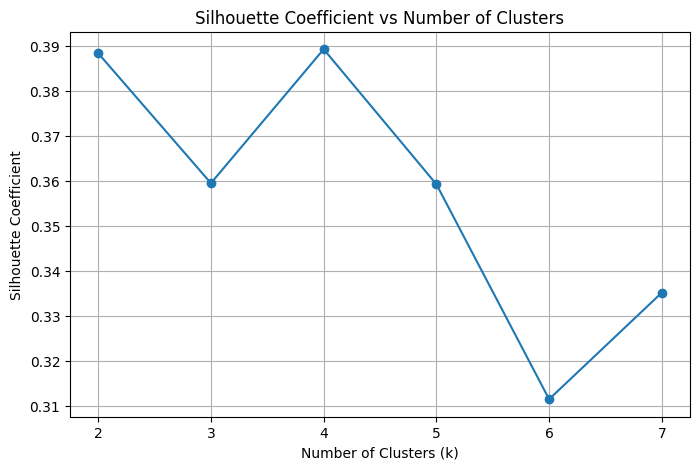

In [44]:
# write your code here

plt.figure(figsize=(8,5))
plt.plot(range(2, 8), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient vs Number of Clusters')
plt.xticks(range(2, 8))
plt.grid(True)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Visualize the silhouette scores using silhouette plot and obtain the clusters for K from 2 to 6.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

For n_clusters = 2, the average silhouette_score is: 0.3884


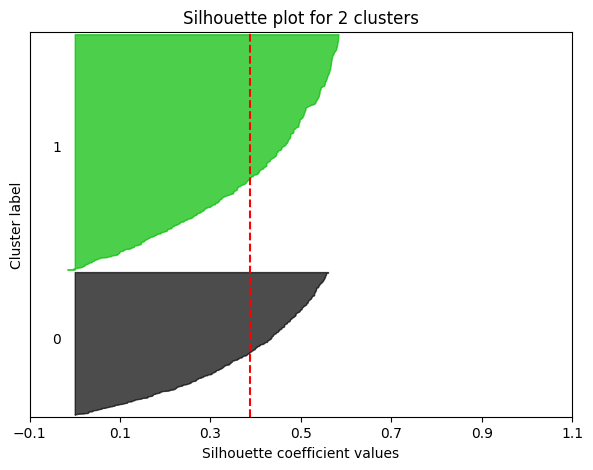

For n_clusters = 3, the average silhouette_score is: 0.3595


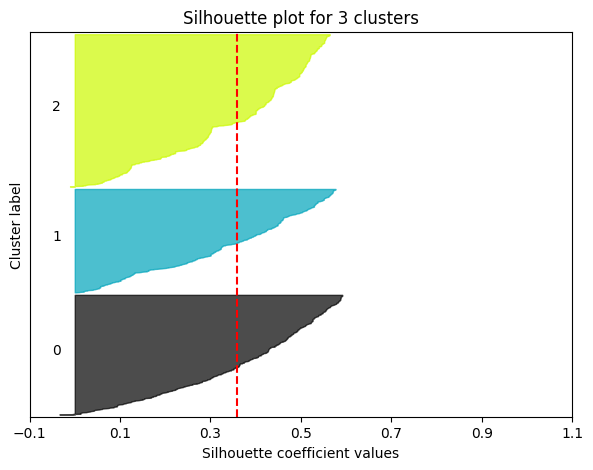

For n_clusters = 4, the average silhouette_score is: 0.3893


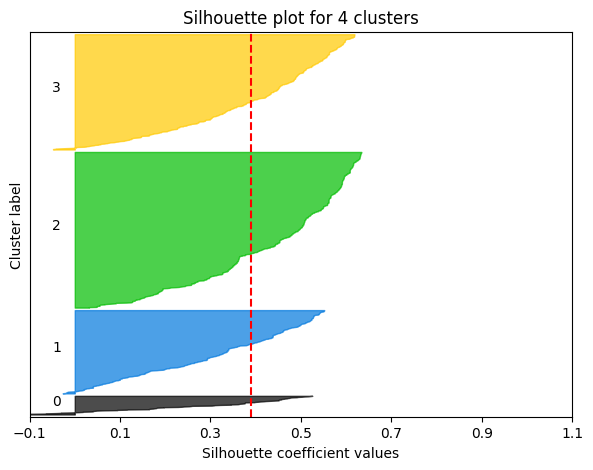

For n_clusters = 5, the average silhouette_score is: 0.3593


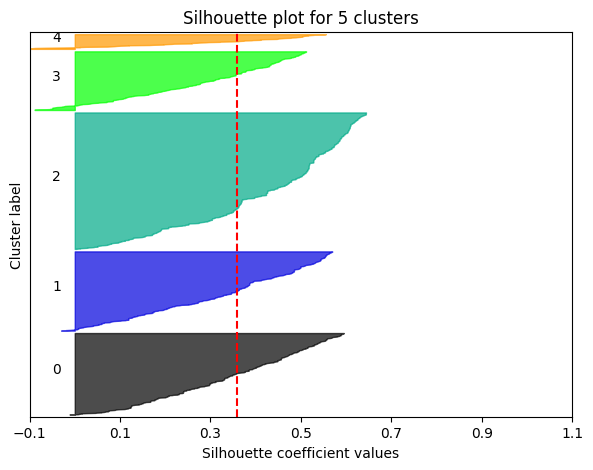

For n_clusters = 6, the average silhouette_score is: 0.3115


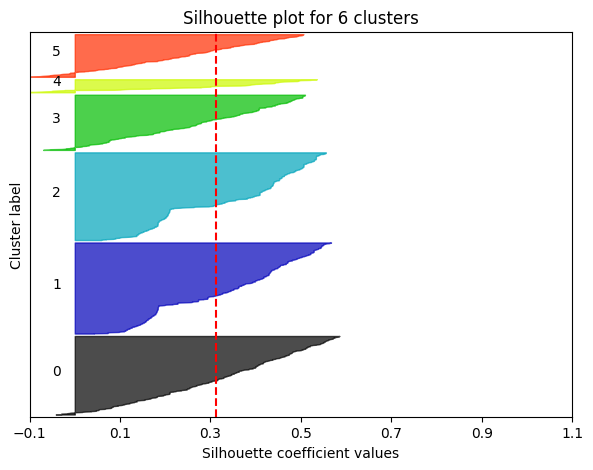

In [45]:
# write your code here

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

values_column = ['DepthMeters', 'Magnitude']
X = df[values_column].values

range_n_clusters = range(2, 7)

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(7, 5)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg:.4f}")

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for spacing between clusters

    ax1.set_title(f"Silhouette plot for {n_clusters} clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

    plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Fit K means clustering algorithm with an optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
# write your code here
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# print(f"KMeans clustering done with k={optimal_k}")
print(df['cluster']) 

0       2
1       0
2       0
3       2
4       2
       ..
1642    0
1643    0
1644    1
1645    0
1646    0
Name: cluster, Length: 1647, dtype: int32


<a id="inter"> </a>
## 3. Interpret the Clusters

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Consider the groups formed in the previous question and display the size of each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
# write your code here

cluster_sizes = df['cluster'].value_counts().sort_index()
print("Size of each cluster:")
print(cluster_sizes)


Size of each cluster:
cluster
0    525
1    454
2    668
Name: count, dtype: int64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Plot the number of observations in each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

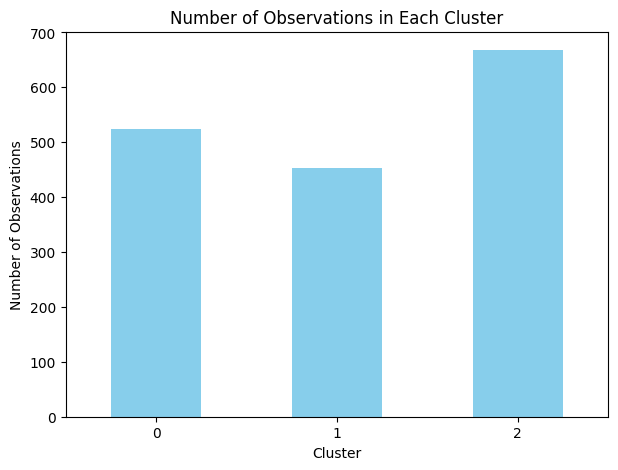

In [50]:
# write your code here

cluster_sizes = df['cluster'].value_counts().sort_index()

plt.figure(figsize=(7,5))
cluster_sizes.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.title('Number of Observations in Each Cluster')
plt.xticks(rotation=0)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Obtain the centroids of the clusters formed using K-means clustering.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
# write your code here
centroids = kmeans.cluster_centers_

centroids_df = pd.DataFrame(centroids, columns=values_column)
print("Centroids of each cluster:")
print(centroids_df)

Centroids of each cluster:
   DepthMeters  Magnitude
0     1.191134   0.015846
1    -0.387416  -0.945821
2    -0.675637   0.631286


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Obtain the observations belonging to the 1st cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
# write your code here

cluster_1_data = df[df['cluster'] == 0]

# Get summary statistics of this cluster
summary_cluster_1 = cluster_1_data.describe()

print("Summary statistics for cluster 1 (label 0):")
print(summary_cluster_1)

Summary statistics for cluster 1 (label 0):
       DepthMeters   Magnitude  cluster
count   525.000000  525.000000    525.0
mean      1.192144    0.012912      0.0
std       0.618482    0.797144      0.0
min       0.180671   -2.360158      0.0
25%       0.776322   -0.402111      0.0
50%       1.122185    0.033011      0.0
75%       1.410403    0.468132      0.0
max       4.753739    3.078861      0.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the observations belonging to the 2nd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [53]:
# write your code here

cluster_2_data = df[df['cluster'] == 1]

# Get summary statistics of this cluster
summary_cluster_2 = cluster_2_data.describe()

print("Summary statistics for cluster 2 (label 1):")
print(summary_cluster_2)

Summary statistics for cluster 2 (label 1):
       DepthMeters   Magnitude  cluster
count   454.000000  454.000000    454.0
mean     -0.387416   -0.945821      1.0
std       0.581068    0.655526      0.0
min      -1.433353   -4.753326      1.0
25%      -0.760843   -1.272354      1.0
50%      -0.482232   -0.837232      1.0
75%       0.007739   -0.402111      1.0
max       1.327781   -0.184550      1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Obtain the observations belonging to the 3rd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
# write your code here

cluster_3_data = df[df['cluster'] == 2]

# Get summary statistics of this cluster
summary_cluster_3 = cluster_3_data.describe()

print("Summary statistics for cluster 3 (label 2):")
print(summary_cluster_3)

Summary statistics for cluster 3 (label 2):
       DepthMeters   Magnitude  cluster
count   668.000000  668.000000    668.0
mean     -0.673636    0.632671      2.0
std       0.513980    0.817502      0.0
min      -1.433353   -0.184550      2.0
25%      -1.125920    0.092840      2.0
50%      -0.703200    0.468132      2.0
75%      -0.333319    0.903254      2.0
max       0.949254    6.124712      2.0
